In [45]:
#1. Importation des Données
import pandas as pd
import matplotlib.pyplot as plt

def importation_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    else:
        raise ValueError("Erreur. Utilisez CSV, Excel ou JSON.")

df = importation_data("mes_ventes.csv") 
print("Données chargées avec succès")

Données chargées avec succès


In [46]:
#2. Exploration des Données
print("\n--- 5 premières lignes---")
print(df.head())

print("\n--- Informations du DataFrame ---")
print(df.info())

print("\n--- Statistiques descriptives ---")
print(df.describe())

print("\n--- Valeurs manquantes ---")
print(df.isnull().sum())
df_clean = df.dropna()  


--- 5 premières lignes---
         Date     Produit Région  Ventes       Profit
0  2023-01-01    Tablette   Nord     963   683.382646
1  2023-01-02      Casque  Ouest    2890   189.902962
2  2023-01-03  Ordinateur  Ouest     663   543.140093
3  2023-01-04    Tablette    Sud    4291  1429.370035
4  2023-01-05    Tablette  Ouest    1857   836.898463

--- Informations du DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     100 non-null    object 
 1   Produit  100 non-null    object 
 2   Région   100 non-null    object 
 3   Ventes   100 non-null    int64  
 4   Profit   100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB
None

--- Statistiques descriptives ---
            Ventes       Profit
count   100.000000   100.000000
mean   2610.520000   549.187517
std    1297.836486   342.687940
min     246.000

In [51]:
# Sélectionner des colonnes
selec_colonnes = df[["Ventes", "Profit"]]
print(selec_colonnes)
# Filtrer selon un critère 
df_filtre = df[df["Ventes"] > 2000]
print('\n______Ventes > 2000_____\n\n',df_filtre)

# Créer une nouvelle colonne
df["nouvelle_colonne"] = df["Ventes"] * 2

# Trier les données
df_trie = df.sort_values("Ventes", ascending=False)
print('\n______données Triees_____\n\n',df_filtre)


    Ventes       Profit
0      963   683.382646
1     2890   189.902962
2      663   543.140093
3     4291  1429.370035
4     1857   836.898463
..     ...          ...
95    4161   570.935303
96    3469   160.103685
97     362   511.472205
98     723   476.022153
99    1116   392.500937

[100 rows x 2 columns]

______Ventes > 2000_____

           Date     Produit Région  Ventes       Profit  nouvelle_colonne
1   2023-01-02      Casque  Ouest    2890   189.902962              5780
3   2023-01-04    Tablette    Sud    4291  1429.370035              8582
6   2023-01-07  Ordinateur  Ouest    3342   380.166324              6684
7   2023-01-08  Ordinateur    Sud    4736   502.216248              9472
10  2023-01-11    Tablette    Sud    3414  1347.915081              6828
..         ...         ...    ...     ...          ...               ...
91  2023-04-02      Casque   Nord    2485   456.283611              4970
92  2023-04-03   Téléphone    Est    3019   463.416642              6038
93 

In [52]:
#4. Analyse Statistique
# Statistiques de base
moyenne = df["Ventes"].mean()
mediane = df["Ventes"].median()
ecart_type = df["Ventes"].std()

print(f"\nMoyenne: {moyenne:.2f}")
print(f"Médiane: {mediane:.2f}")
print(f"Écart-type: {ecart_type:.2f}")

# Agrégations par groupe
df_group = df.groupby("Produit").agg({
    "Ventes": ["mean", "median", "count"],
    "Profit": ["min", "max"]
})
print("\n=== Agrégations par groupe ===")
print(df_group)


Moyenne: 2610.52
Médiane: 2750.00
Écart-type: 1297.84

=== Agrégations par groupe ===
                 Ventes                    Profit             
                   mean  median count         min          max
Produit                                                       
Casque      2596.433333  2693.0    30  121.085377  1286.096043
Ordinateur  2415.400000  2014.5    20  132.961695  1173.516014
Tablette    2726.041667  2894.0    24  176.559986  1429.370035
Téléphone   2670.230769  2678.0    26   28.010552   963.144272


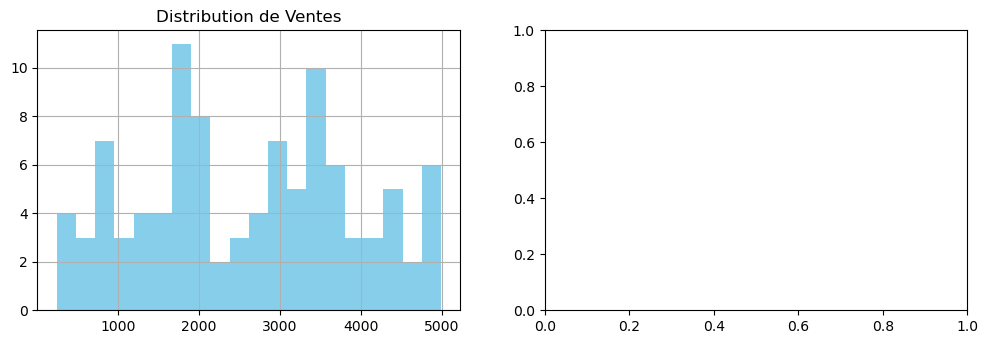

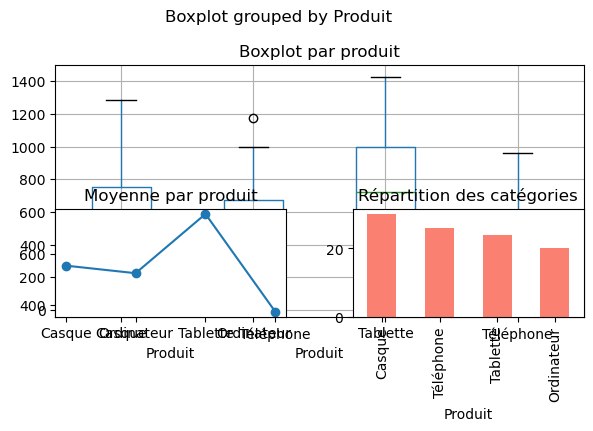

In [34]:
#5. Visualisation des Données
# Configuration des graphiques
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df["Ventes"].hist(bins=20, color='skyblue')
plt.title("Distribution de Ventes")
 
plt.subplot(2, 2, 2)
df.boxplot(column="Profit", by="Produit")
plt.title("Boxplot par produit")

# Courbe (moyenne par groupe)
plt.subplot(2, 2, 3)
df.groupby("Produit")["Profit"].mean().plot(kind='line', marker='o')
plt.title("Moyenne par produit")

# Diagramme à barres (fréquence)
plt.subplot(2, 2, 4)
df["Produit"].value_counts().plot(kind='bar', color='salmon')
plt.title("Répartition des catégories")

plt.tight_layout()
plt.savefig("visualisations.png") 
plt.show()  # Affiche les graphiques